# SixPlusNice Bingo Script

Trage hier statt username deinen Usernamen ein. Wenn du das gemacht hast, drücke zweimal die Tastenkombination Shift+Enter.

In [94]:
seed_str = "username"

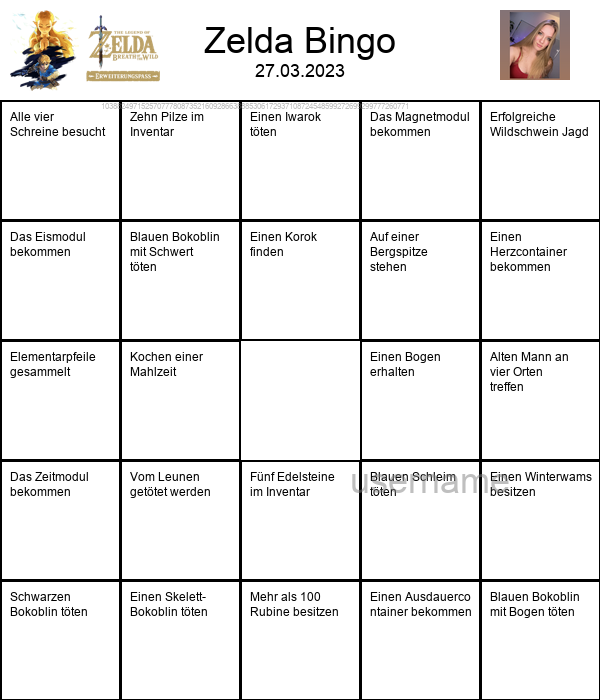

In [95]:
import random
import hashlib
import textwrap
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
import requests
import datetime
from io import BytesIO

CARD_SIZE = (600, 700)
FONT_NAME = "arial.ttf"

# Liest die Datei
with open("botw_input.txt", "r") as f:
    entries = f.read().splitlines()

seed = int(hashlib.sha256(seed_str.encode()).hexdigest(), 16)
random.seed(seed)
random.shuffle(entries)

# Hinzufügen von Titel und Erstelldatum
title = "Zelda Bingo"
create_date = datetime.datetime.now().strftime("%d.%m.%Y")

# URL des Bildes (ersetzen Sie diese durch die tatsächliche URL)
image_url = "https://fs-prod-cdn.nintendo-europe.com/media/images/08_content_images/games_6/nintendo_switch_7/nswitch_thelegendofzeldabreathofthewild/NSwitch_TheLegendOfZeldaBreathOfTheWild_ExpansionPass_Expansion_img_DE.png"

# Bild von der URL laden
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# URL des Avatars (ersetzen Sie diese durch die tatsächliche URL)
avatar_url = "https://static-cdn.jtvnw.net/jtv_user_pictures/adcf795f-7644-45a8-9d94-192076b67d63-profile_image-70x70.png"

# Avatar von der URL laden
response2 = requests.get(avatar_url)
image2 = Image.open(BytesIO(response2.content))
card = []
for i in range(5):
    row = []
    for j in range(5):
        if i == 2 and j == 2:
            row.append("FREE")
        else:
            row.append(entries.pop())
    card.append(row)
    watermark = Image.new("RGBA", CARD_SIZE, (0, 0, 0, 0))
draw = ImageDraw.Draw(watermark)
font = ImageFont.truetype(FONT_NAME, 8)
draw.text((101, 101), str(seed), font=font, fill=(128, 128, 128, 128))
font = ImageFont.truetype(FONT_NAME, 36)
draw.text((350, 460), seed_str, font=font, fill=(128, 128, 128, 128))
bingo_card = Image.new("RGBA", CARD_SIZE, (255, 255, 255, 255))
draw = ImageDraw.Draw(bingo_card)
font_size = 12 # Starting font size
word_size = 16 # Starting font size
for i in range(5):
    for j in range(5):
        text = card[i][j]
        if text == "FREE":
            fill = (128, 128, 128, 128)
        else:
            fill = (0, 0, 0, 255)
            wrapped_text = textwrap.fill(text, width=word_size) # Adjust the width to fit your bingo tile
            font = ImageFont.truetype(FONT_NAME, font_size)
            draw.rectangle((i*120, j*120+100, (i+1)*120, (j+1)*120+100), outline=(0, 0, 0, 255), width=2)
            draw.text((i*120+10, j*120+10+100), wrapped_text, font=font, fill=fill)

bingo_card.alpha_composite(watermark)
# Titel und Erstelldatum hinzufügen
title_font = ImageFont.truetype(FONT_NAME, 36)
title_bbox = draw.textbbox((0, 0), title, font=title_font)  # Verwendung von textbbox
title_width = title_bbox[2] - title_bbox[0]
draw.text(((CARD_SIZE[0] - title_width) // 2, 20), title, font=title_font, fill=(0, 0, 0, 255))

date_font = ImageFont.truetype(FONT_NAME, 18)
date_bbox = draw.textbbox((0, 0), create_date, font=date_font)  # Verwendung von textbbox
date_width = date_bbox[2] - date_bbox[0]
draw.text(((CARD_SIZE[0] - date_width) // 2, 60), create_date, font=date_font, fill=(0, 0, 0, 255))

# Bild hinzufügen
image.thumbnail((150, 200))
bingo_card.paste(image, (10, 10))

# Avatar hinzufügen
image2.thumbnail((150, 150))  
bingo_card.paste(image2, (500, 10))
display(bingo_card)